<a href="https://colab.research.google.com/github/bhattacharya5/DeepLearning/blob/main/M21AIE211_DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-1:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Deep Learning"

/content/gdrive/My Drive/Colab Notebooks/Deep Learning


In [ ]:
#!tar -xvf "VOCtrainval_11-May-2012.tar" -C "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval"

In [ ]:
#!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

# Step-1: Download any CNN model pre-trained on the ImageNet classification dataset.

In [ ]:
from skimage import io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import random
import seaborn as sns


#magic command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import sklearn
from sklearn import svm
from sklearn import metrics

#Import keras libraries
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions

<br>VGG-16 is a convolutional neural network that is 16 layers deep. We can load a pretrained version of the network trained on more than a million images from the ImageNet classification database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224. 

In [ ]:
class vgg_model: 
  def __init__(self):
    #vgg model generated
    self.model = VGG16()

  def vgg_encoder(self, path_of_image):
    # image encoding using vgg cnn model
    _image = load_img(path_of_image, target_size=(224, 224))
    _image = img_to_array(_image)
    _image = _image.reshape((1, _image.shape[0], _image.shape[1], _image.shape[2]))
    _image = preprocess_input(_image)
    y_cap = self.model.predict(_image)
    return y_cap

# Step-2: Download the PASCAL VOC 2012 dataset from the following link:
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html

In [ ]:
#list to hold training and validation data set
training_list = []
validation_list = []

txt_files = "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/ImageSets/Main/"
txt_file_list = sorted([fls for fls in listdir(txt_files) if isfile(join(txt_files, fls))])

#updating the list based on training and validation files
for i in range(len(txt_file_list)):
  if '_train.txt' in txt_file_list[i] :
    training_list.append(txt_file_list[i])
  elif '_val.txt' in txt_file_list[i]:
    validation_list.append(txt_file_list[i])

In [ ]:
print(training_list[len(training_list)-2])

train_train.txt


# Step-3: Pick any one category of your choice from the dataset. From the training set, randomly select 20-50 (at least 20 and at most 50) images from this category (call it category ‘A’), and randomly select 50 images from all the remaining nineteen categories (call it category “not A”). This will be the training dataset.<br>
###<font color="blue">Preparing category A for training dataset, I am picking "Train" images for category A</font>

In [ ]:
#pick train_train.txt from training list
cat_A = training_list[len(training_list)-2]
train_file = "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/ImageSets/Main/"+ str(cat_A)
df = pd.read_csv(train_file, sep='-1', lineterminator='\r')
train_image_list = df.values.tolist()
random_50_train_images = random.sample(train_image_list, 50)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


###<font color="blue">Preparing category Not A for training dataset</font>

In [ ]:
cat_0A = training_list
#remove train list fromtraining list
cat_0A.remove(cat_0A[len(cat_0A)-2])
random_cat0_50_train_images = []
for i in range(len(cat_0A)):
  train_nots_file = "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/ImageSets/Main/"+ str(cat_0A[i])
  _df = pd.read_csv(train_nots_file, sep='-1', lineterminator='\r')
  train_image_0_list = _df.values.tolist()
  random_cat0_50_train_images += train_image_0_list

random_cat0_50_train_images = random.sample(random_cat0_50_train_images, 50)

# Step-4: Represent these images using the (1000-dimensional) output of the prediction layer of the above CNN model, and train a binary SVM classifier using the training data collected in step-3.<br>
###<font color="blue">Representing images through VGG16 CNN pretrained model using category Train A dataset</font>

In [ ]:
#Preparing VGG category A dataset
vgg_catA = []

#Initializing VGG model
vgg_encoding  = vgg_model()

for i in range(len(random_50_train_images)):    
    try:      
      ycap = vgg_encoding.vgg_encoder('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_50_train_images[i][0])).replace(' ', '') +'.jpg')      
      vgg_catA.append(ycap.flatten())
    except:
      print('File Excluded', random_50_train_images[i][0])
      pass
    

553476096/553467096 [==============================] - 10s 0us/step
File Excluded 2009_005084  1
File Excluded 2010_004669  1


###<font color="blue">Representing images through VGG16 CNN pretrained model using category not A Train dataset</font>

In [ ]:
vgg_0_catA = []

#Initializing VGG model
vgg_encoding  = vgg_model()

for i in range(len(random_cat0_50_train_images)):    
    try:
        ycap = vgg_encoding.vgg_encoder('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_cat0_50_train_images[i][0])).replace(' ', '') +'.jpg')
        vgg_0_catA.append(ycap.flatten())
    except:
      print('File Excluded ', random_cat0_50_train_images[i][0])
      pass   


File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  2008_001413  0
File Excluded  2011_001891  1
File Excluded  nan


### <font color="blue">Prepare Training Data</font>

In [ ]:
train_x = vgg_catA + vgg_0_catA
train_y = []
#Appending 1 for all Category A data i.e. Train
for i in range(len(vgg_catA)):
  train_y.append(1)

#Appending 0 for all non Category A data, which are not Train
for j in range(len(vgg_0_catA)):
  train_y.append(0)

### <font color="blue"> Train SVM model

In [ ]:
#Build SVM model
svm_clf = svm.SVC()

#Fitting the model
svm_clf.fit(train_x,train_y)

SVC()

#Step-5: Use the entire validation set and split the images into two sets: the first set is of all the images from category ‘A’, and the second set is of all the remaining images (category “not A”). Represent these images in the same way as done in step-4.<br>
######<font color="blue">Preparing category A for test dataset, "Train" images for category A</font>

In [ ]:
print(validation_list[len(validation_list)-2])

train_val.txt


In [ ]:
cat_A = validation_list[len(validation_list)-2]
test_file = "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/ImageSets/Main/"+ str(cat_A)
df = pd.read_csv(test_file, sep='-1', lineterminator='\r')
test_img_list = df.values.tolist()
random_catA_test_images = random.sample(test_img_list, 1000)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


######<font color="blue">Preparing category A for test dataset, "Test" images for category Not A</font>

In [ ]:
cat_0_A = validation_list
cat_0_A.remove(validation_list[len(validation_list)-2])
random_0_catA_test_images = []

#Loop through all validation images which are not Aeroplane
for i in range(len(cat_0_A)):
  test_nots_file = "/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/ImageSets/Main/"+ str(cat_0_A[i])
  _df = pd.read_csv(test_nots_file, sep='-1', lineterminator='\r')
  test_img_nots_list = _df.values.tolist()
  random_0_catA_test_images += test_img_nots_list

random_0_catA_test_images = random.sample(random_0_catA_test_images, 1000)

###<font color="blue">Representing images through VGG16 CNN pretrained model using category A test dataset</font>

In [ ]:
vgg_catA = []

#Initializing VGG model
vgg_encoding  = vgg_model()

for i in range(len(random_catA_test_images)):    
    try:
        ycap = vgg_encoding.vgg_encoder('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_catA_test_images[i][0])).replace(' ', '') +'.jpg')
        vgg_catA.append(ycap.flatten())
    except:
      print('File Excluded ', random_catA_test_images[i][0])
      pass   


File Excluded  2011_001827  1
File Excluded  2009_002638  1
File Excluded  2011_000521  1
File Excluded  2009_000051  1
File Excluded  2010_001151  1
File Excluded  2008_000190  1
File Excluded  2008_002158  1
File Excluded  2009_005148  1
File Excluded  2011_003028  1
File Excluded  2009_000689  1
File Excluded  2011_001375  1
File Excluded  2011_000283  1
File Excluded  2010_004980  1
File Excluded  2011_003146  1
File Excluded  2011_002105  1
File Excluded  2009_004669  1
File Excluded  2011_000627  1
File Excluded  2008_008726  1
File Excluded  2008_004212  1
File Excluded  2010_005463  1
File Excluded  2008_008001  1
File Excluded  2011_001525  1
File Excluded  2008_006368  1
File Excluded  2008_004357  1
File Excluded  2009_001350  1
File Excluded  2009_001648  1
File Excluded  2009_002669  1
File Excluded  2008_001905  1
File Excluded  2009_001333  1
File Excluded  2008_008732  1
File Excluded  2009_004677  1
File Excluded  2009_003951  1
File Excluded  2009_000283  1
File Exclu

###<font color="blue">Representing images through VGG16 CNN pretrained model using Non category A test dataset</font>

In [ ]:
vgg_0_catA = []

#Initializing VGG model
vgg_encoding  = vgg_model()

for i in range(len(random_0_catA_test_images)):    
    try:
        ycap = vgg_encoding.vgg_encoder('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_0_catA_test_images[i][0])).replace(' ', '') +'.jpg')
        vgg_0_catA.append(ycap.flatten())
    except:
      print('File Excluded ', random_0_catA_test_images[i][0])
      pass   


File Excluded  2009_004897  1
File Excluded  2008_001816  0
File Excluded  nan
File Excluded  2008_006408  1
File Excluded  2009_004899  1
File Excluded  nan
File Excluded  2010_000098  1
File Excluded  nan
File Excluded  2008_007583  1
File Excluded  2010_001737  1
File Excluded  nan
File Excluded  2008_003650  1
File Excluded  nan
File Excluded  2009_003098  1
File Excluded  2009_002524  1
File Excluded  2009_000412  1
File Excluded  2008_000579  1
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  2009_003154  1
File Excluded  2009_003110  1
File Excluded  2008_002384  1
File Excluded  nan
File Excluded  nan
File Excluded  2008_001063  1
File Excluded  2009_001082  1
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  nan
File Excluded  2008_002047  1
File Excluded  2008_000270  1
File Excluded  2011_001329  1
File Excluded  nan
File Excluded  2010_005594  1
File Excluded  2009_000414  1
File Excluded  nan
File Excluded  20

### <font color="blue">Prepare Validation / Test Data</font>

In [ ]:
test_x = vgg_catA + vgg_0_catA
test_y = []

#Appending 1 for all Category A data i.e. Train
for i in range(len(vgg_catA)):
  test_y.append(1)

#Appending 0 for all non Category A data, which are not Train
for j in range(len(vgg_0_catA)):
  test_y.append(0)

# Step-6: Evaluate the classification accuracy of the classifier learned in step-4 on the test set created in step-5. Also provide the confusion matrix.

### <font color="blue">Applying our learnt model on test data</font>

In [ ]:
test_predict = svm_clf.predict(test_x)

### <font color="blue">Generating Accuracy score</font>

In [ ]:
metrics.accuracy_score(test_y,test_predict)

0.508991825613079

### <font color="blue">Create confusion matrix</font>

In [ ]:
conf = metrics.confusion_matrix(test_y, test_predict)
conf

array([[174, 702],
       [199, 760]])

### <font color="blue">Plotting confusion matrix</font>

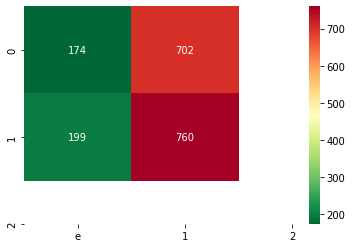

In [ ]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True) 
sns.heatmap(conf, cmap = 'RdYlGn_r', xticklabels=['e', '1', '2'],yticklabels=['0', '1', '2'], annot=True, fmt="d") 
plt.show();

# Step-7: Submit all the codes along with a detailed write-up (PDF) containing all the analyses and relevant details. Also show some sample images from the training set you created in step-3, and put the complete list of the names of images in this set (one per line) in the appendix.

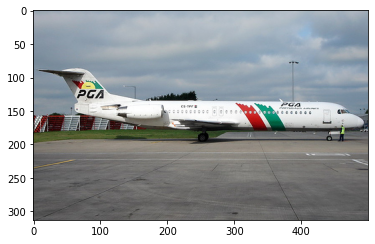

In [ ]:
image = io.imread('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_0_catA_test_images[30][0])).replace(' ', '') +'.jpg')
plt.imshow(image)

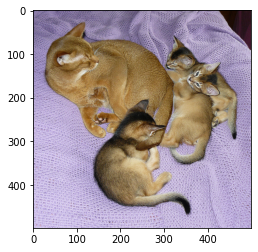

In [ ]:
image = io.imread('/content/gdrive/My Drive/Colab Notebooks/Deep Learning/VOCtrainval/VOCdevkit/VOC2012/JPEGImages/'+ (str(random_cat0_50_train_images[40][0])).replace(' ', '') +'.jpg')
plt.imshow(image)

In [ ]:
train_img_50_list = random.sample(random_50_train_images, 50)
print( "Category A list")
for i in range(len(train_img_50_list)):
  if str(train_img_50_list[i][0]).replace(' ', '') +'.jpg' != 'nan.jpg':
      print(str(train_img_50_list[i][0]).replace(' ', '') +'.jpg')

Category A list
2011_002930.jpg
2010_002425.jpg
2009_000280.jpg
2008_003685.jpg
2008_005536.jpg
2010_003672.jpg
2010_004264.jpg
2010_003055.jpg
2010_001899.jpg
2010_000310.jpg
2009_002674.jpg
2010_000043.jpg
2010_003894.jpg
2009_003200.jpg
2010_005898.jpg
2009_004684.jpg
2008_003417.jpg
2010_0046691.jpg
2009_003218.jpg
2008_000790.jpg
2011_002418.jpg
2008_000422.jpg
2010_002962.jpg
2011_000219.jpg
2010_002794.jpg
2009_005163.jpg
2010_002747.jpg
2008_000028.jpg
2010_002642.jpg
2010_001154.jpg
2008_002793.jpg
2009_004723.jpg
2009_004688.jpg
2010_003238.jpg
2008_000873.jpg
2008_004410.jpg
2009_001638.jpg
2010_004852.jpg
2011_001382.jpg
2010_003115.jpg
2010_001481.jpg
2010_002935.jpg
2011_002676.jpg
2011_001354.jpg
2009_0050841.jpg
2008_003655.jpg
2010_003665.jpg
2010_004973.jpg
2009_000343.jpg
2011_001464.jpg


In [ ]:
train_img_not50_list = random.sample(random_cat0_50_train_images, 50)
print("Not Category A list")
for i in range(len(train_img_not50_list)):
  if str(train_img_not50_list[i][0]).replace(' ', '') +'.jpg' != 'nan.jpg':
      print(str(train_img_not50_list[i][0]).replace(' ', '') +'.jpg')

Not Category A list
2008_008480.jpg
2009_004760.jpg
2008_004934.jpg
2008_000514.jpg
2010_004793.jpg
2009_001205.jpg
2008_003021.jpg
2008_001455.jpg
2011_000176.jpg
2008_003814.jpg
2008_006677.jpg
2008_003196.jpg
2009_001117.jpg
2010_005019.jpg
2009_003966.jpg
2009_001817.jpg
2011_000725.jpg
2008_002093.jpg
2011_0018911.jpg
2008_004808.jpg
2008_005650.jpg
2009_004452.jpg
2008_000262.jpg
2010_003353.jpg
2010_004072.jpg
2010_001850.jpg
2009_002993.jpg
2011_002474.jpg
2010_004696.jpg
2010_004045.jpg
2008_0014130.jpg
2011_002533.jpg
2009_002791.jpg
2010_001385.jpg
2009_000120.jpg
2008_001566.jpg
2009_005297.jpg
2011_001961.jpg
2010_001974.jpg
2010_004560.jpg


# -- <font color='orange'> END </font>--